# 소프트맥스 회귀
---

## 1) 패키지 준비하기

In [1]:
from pandas import read_excel
from pandas import DataFrame
from pandas import merge
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

# (신규) One-Hot-Encoding을 처리하기 위한 패키지
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## 2) 데이터셋 준비하기

In [3]:
df = read_excel("http://itpaper.co.kr/data/iris.xlsx", engine='openpyxl')
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 3) 데이터 전처리

### 결측치 확인

In [4]:
df.isna().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

### 종속변수 레이블링을 위해 값의 종류 확인

In [5]:
uni = df['Species'].unique()
print(uni)

label_count = len(uni)
print(label_count)

['setosa' 'versicolor' 'virginica']
3


### 종속변수 레이블링

In [6]:
df['Species'] = df['Species'].astype('category').cat.rename_categories({'setosa': 0, 'virginica': 1, 'versicolor': 2})
df['Species'].value_counts()

0    50
2    50
1    50
Name: Species, dtype: int64

## 4) 탐색적 데이터 분석

### 기본통계 확인

In [7]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 산점도 그래프와 추세선 확인

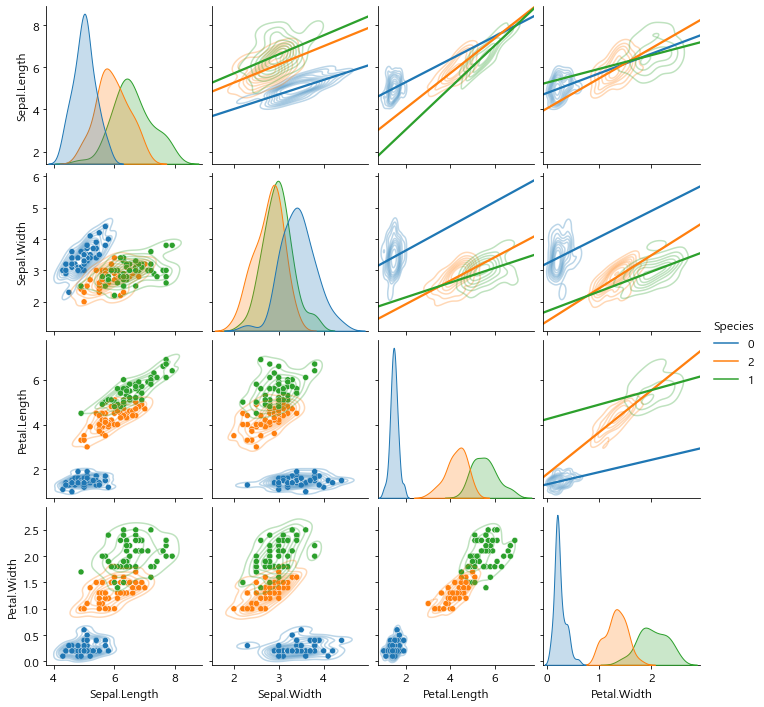

In [8]:
# 그래프 기본 설정
# ----------------------------------------
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (30, 30)
plt.rcParams['axes.unicode_minus'] = False

# 산점도 행렬
# ----------------------------------------
ax = sns.pairplot(df, hue="Species", kind="kde", plot_kws={"alpha":0.3})
ax.map_lower(sns.scatterplot)
ax.map_upper(sns.regplot, scatter=False, truncate=False, ci=False)

plt.show()
plt.close()

## 5) 데이터셋 분할하기

### 랜덤시드 고정

In [ ]:
np.random.seed(777)

### 훈련 데이터(독립변수)와 레이블(종속변수) 구분하기

In [9]:
x_data_set = df.filter(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'])
y_data_set = df.filter(['Species'])

### one-hot인코딩

In [10]:
y_data_set['Species'] = y_data_set['Species'].astype('int')
y_data_set_1hot = to_categorical(y_data_set)
y_data_set_1hot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

### 훈련 데이터와 검증 데이터로 분할

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_data_set, y_data_set_1hot, test_size=0.33, random_state=777)
print("훈련용 데이터셋 크기: %s, 훈련용 레이블셋 크기: %s" % (x_train.shape, y_train.shape))
print("검증용 데이터셋 크기: %s, 검증용 레이블셋 크기: %s" % (x_test.shape, y_test.shape))

훈련용 데이터셋 크기: (100, 4), 훈련용 레이블셋 크기: (100, 3)
검증용 데이터셋 크기: (50, 4), 검증용 레이블셋 크기: (50, 3)


## 6) 모델 개발

### 모델 정의

In [12]:
model = Sequential()
model.add(Dense(256, input_shape=(len(x_train.columns), ), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(label_count, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               1280      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 42,627
Trainable params: 42,627
Non-trainable params: 0
_________________________________________________________________


### 학습하기

In [13]:
result = model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test), callbacks = [
    #ModelCheckpoint(filepath = 'check_point.h5', monitor = 'val_loss', verbose=1, save_best_only = True),
    EarlyStopping(monitor = 'val_loss', patience=5, verbose = 1),
    ReduceLROnPlateau(monitor= "val_loss", patience=3, factor = 0.5, min_lr=0.0001, verbose=1)
])

result_df = DataFrame(result.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

Epoch 1/500
4/4 [==============================] - 2s 203ms/step - loss: 0.9679 - acc: 0.5200 - val_loss: 0.8649 - val_acc: 0.4600
Epoch 2/500
4/4 [==============================] - 0s 7ms/step - loss: 0.8332 - acc: 0.5200 - val_loss: 0.6969 - val_acc: 0.9800
Epoch 3/500
4/4 [==============================] - 0s 7ms/step - loss: 0.6937 - acc: 0.8500 - val_loss: 0.6784 - val_acc: 0.6000
Epoch 4/500
4/4 [==============================] - 0s 6ms/step - loss: 0.6431 - acc: 0.7000 - val_loss: 0.5347 - val_acc: 0.7800
Epoch 5/500
4/4 [==============================] - 0s 6ms/step - loss: 0.5339 - acc: 0.8200 - val_loss: 0.4240 - val_acc: 0.9400
Epoch 6/500
4/4 [==============================] - 0s 7ms/step - loss: 0.4548 - acc: 0.9100 - val_loss: 0.5033 - val_acc: 0.6200
Epoch 7/500
4/4 [==============================] - 0s 6ms/step - loss: 0.4622 - acc: 0.7100 - val_loss: 0.3820 - val_acc: 0.9200
Epoch 8/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3816 - acc: 0.9300 - v

,loss,acc,val_loss,val_acc,lr
epochs,,,,,
1,0.967897,0.52,0.864897,0.46,0.0010
2,0.833220,0.52,0.696904,0.98,0.0010
3,0.693679,0.85,0.678392,0.60,0.0010
4,0.643128,0.70,0.534743,0.78,0.0010
5,0.533947,0.82,0.423983,0.94,0.0010
...,...,...,...,...,...
81,0.107442,0.97,0.064638,0.98,0.0001
82,0.106463,0.98,0.068053,1.00,0.0001
83,0.112045,0.98,0.071965,1.00,0.0001


## 7) 학습 결과 평가

### 학습 결과 시각화

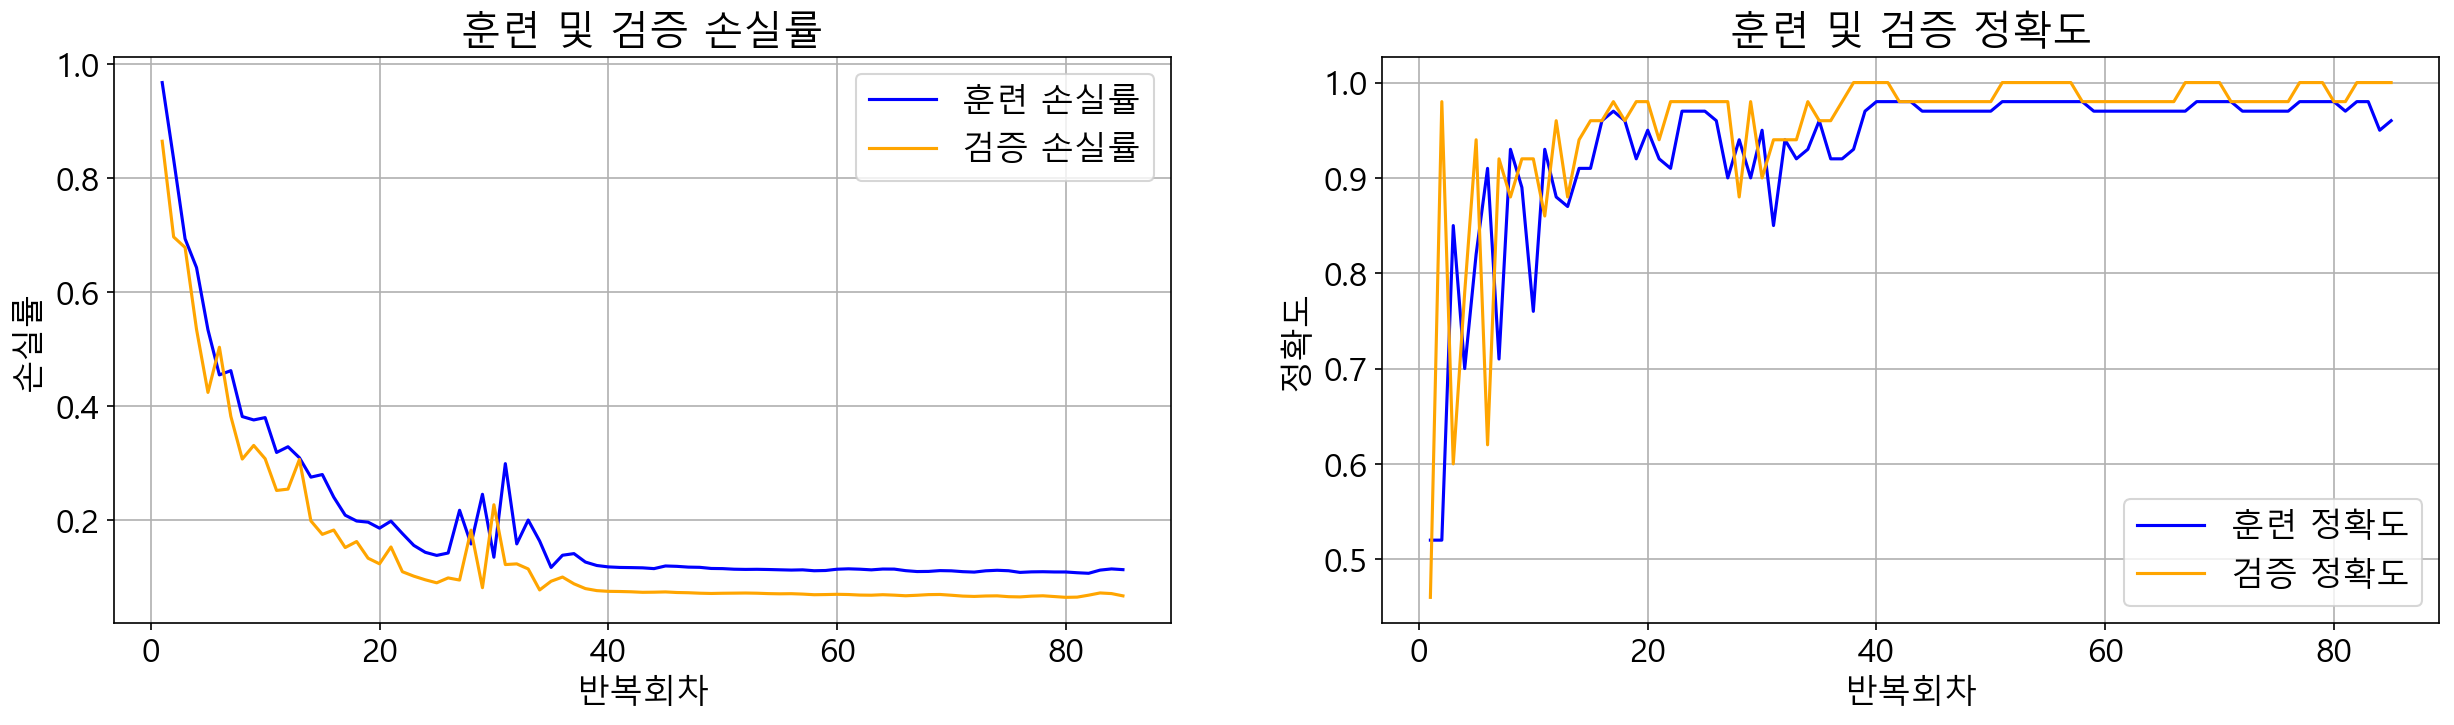

In [14]:
# 그래프 기본 설정
# ----------------------------------------
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

# 그래프를 그리기 위한 객체 생성
# ----------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5), dpi=150)

# 1) 훈련 및 검증 손실 그리기
# ----------------------------------------
sns.lineplot(x=result_df.index, y='loss', data=result_df, color='blue', label='훈련 손실률', ax=ax1)
sns.lineplot(x=result_df.index, y='val_loss', data=result_df, color='orange', label='검증 손실률', ax=ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()

# 2) 훈련 및 검증 절대오차 그리기
# ----------------------------------------
sns.lineplot(x=result_df.index, y='acc', data=result_df, color = 'blue', label = '훈련 정확도', ax=ax2)
sns.lineplot(x=result_df.index, y='val_acc', data=result_df, color = 'orange', label = '검증 정확도', ax=ax2)
ax2.set_title('훈련 및 검증 정확도')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('정확도')
ax2.grid()
ax2.legend()

plt.show()
plt.close()

### 모델 성능 평가

In [15]:
evaluate = model.evaluate(x_test, y_test)
print("최종 손실률: %f, 최종 정확도: %f" % (evaluate[0], evaluate[1]))

2/2 [==============================] - 0s 2ms/step - loss: 0.0669 - acc: 1.0000
최종 손실률: 0.066851, 최종 정확도: 1.000000


## 8) 학습 결과 적용
---

### 테스트 데이터에 대한 예측 결과 산정

In [16]:
results = model.predict(x_test)
data_count, case_count = results.shape
print("%d개의 검증 데이터가 각각 %d개의 경우의 수를 갖는다." % (data_count, case_count))

print(results)

50개의 검증 데이터가 각각 3개의 경우의 수를 갖는다.
[[2.1494141e-06 9.6336913e-01 3.6628667e-02]
 [9.9760038e-01 1.6938053e-05 2.3826922e-03]
 [6.4062610e-06 9.5591354e-01 4.4080008e-02]
 [9.8302462e-06 9.8379797e-01 1.6192203e-02]
 [1.1034511e-03 1.2156370e-01 8.7733293e-01]
 [9.9918038e-01 3.2840908e-06 8.1629114e-04]
 [5.6102917e-06 9.3667048e-01 6.3323945e-02]
 [3.3108231e-06 9.8715425e-01 1.2842379e-02]
 [9.9911481e-01 2.5279348e-06 8.8268955e-04]
 [9.9864846e-01 6.4609771e-06 1.3451830e-03]
 [3.3496235e-06 9.6721488e-01 3.2781854e-02]
 [1.2858652e-03 7.4298806e-02 9.2441535e-01]
 [3.0214137e-03 6.0825743e-02 9.3615282e-01]
 [7.3457122e-05 7.3797256e-01 2.6195392e-01]
 [1.0234467e-05 9.6940649e-01 3.0583235e-02]
 [1.5250039e-05 9.5868021e-01 4.1304637e-02]
 [9.9703741e-01 1.6122287e-05 2.9464907e-03]
 [1.5866065e-04 5.7696187e-01 4.2287949e-01]
 [9.9610150e-01 2.3114739e-05 3.8754030e-03]
 [2.4437681e-03 6.9059893e-02 9.2849636e-01]
 [3.2375082e-03 1.5728822e-02 9.8103368e-01]
 [9.1037125e-04 1.77218

### 결과 데이터 셋 구성

In [18]:
arg_results = np.argmax(results, axis = -1)
arg_results

array([1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 1, 2, 2, 1, 1, 1, 0, 1, 0, 2, 2, 2,
       1, 0, 1, 0, 2, 0, 1, 1, 0, 1, 0, 1, 2, 0, 0, 0, 2, 0, 0, 1, 2, 2,
       0, 1, 1, 0, 1, 2], dtype=int64)

### 실제 결과값과 머신러닝에 의한 예측값 비교

In [19]:
result_df = DataFrame({
    '실제값': np.argmax(y_test, axis = -1),
    '분류결과': arg_results
})

result_df

,실제값,분류결과
0,1,1
1,0,0
2,1,1
3,1,1
4,2,2
5,0,0
6,1,1
7,1,1
8,0,0
9,0,0


NameError: name 'result_df' is not defined